In [426]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

In [427]:
# Loading the dataset
train_images = idx2numpy.convert_from_file('train-images-idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels-idx1-ubyte')
test_images = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')
test_labels = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')

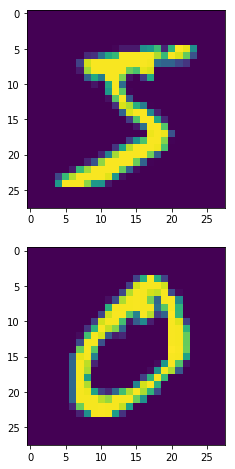

In [428]:
# Plotting some of the images
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].imshow(train_images[0])
ax[1].imshow(train_images[1])
plt.show()

In [429]:
# Converting images to 784 dimension vector and normalizing them
train_images = train_images.reshape(train_images.shape[0], -1) / 255
test_images = test_images.reshape(test_images.shape[0], -1) / 255

In [430]:
X = train_images
y = train_labels

In [431]:
# Defining the architecture of neural Network
n_x = train_images.shape[1]
n_h = 256
n_y = 10

In [432]:
# Initializing the pararmeters
W1 = 0.01 * np.random.randn(n_x, n_h)
b1 = np.ones((1, n_h)) * 0.01
W2 = 0.01 * np.random.randn(n_h, n_y)
b2 = np.ones((1, n_y)) * 0.01

In [433]:
# ReLU Activation function
def ReLU(x):
    return np.maximum(x, 0)

In [434]:
# Forward propagation
Z1 = X.dot(W1) + b1
A1 = ReLU(Z1)
Z2 = A1.dot(W2) + b2
yhat = np.exp(Z2) / np.sum(np.exp(Z2), axis=1, keepdims=True)

In [435]:
m = X.shape[0]

In [436]:
# Cross Entropy Loss
loss = np.mean(-np.log(yhat[range(m), y]))

In [437]:
loss

2.303597409871062

In [438]:
# Backpropagation
dZ2 = yhat
dZ2[range(m),y] -= 1
dZ2 = dZ2 / m
dW2 = A1.T.dot(dZ2)
db2 = np.sum(dZ2, axis=0, keepdims=True)
dZ1 = dZ2.dot(W2.T)
dZ1[dZ1 <= 0] = 0
dW1 = X.T.dot(dZ1)
db1 = np.sum(dZ1, axis=0, keepdims=True)

# Using DropOut Regularization

In [423]:
# Update the paramteres
batch_size = 64
n_epochs = 250
learning_rate = 1e-2
train_loss = []
test_loss = []
test_acc = []
train_acc = []
keep_prob = 0.7
number_of_batches = m // batch_size
for epoch in range(n_epochs):
    loss = 0.0
    correct_cnt = 0
    for i in range(0, m - m % batch_size, batch_size):
        X = train_images[i: i + batch_size]
        y = train_labels[i: i + batch_size]
        # Forward propagation
        Z1 = X.dot(W1) + b1
        A1 = np.tanh(Z1)
        # DropOut
        dropout_mask = np.random.uniform(size=A1.shape)
        dropout_mask = dropout_mask <= keep_prob
        A1 = A1 * dropout_mask
        A1 /= keep_prob
        Z2 = A1.dot(W2) + b2
        yhat = np.exp(Z2) / np.sum(np.exp(Z2), axis=1, keepdims=True)
        # Cross Entropy Loss
        loss += np.mean(-np.log(yhat[range(X.shape[0]), y]))
        correct_cnt += np.sum(np.argmax(yhat, axis=1) == y)
        # Backpropagation
        dZ2 = yhat
        dZ2[range(i % batch_size, (i % batch_size + batch_size)), y] -= 1
        dZ2 = dZ2 / batch_size
        dW2 = A1.T.dot(dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        dZ1 = dZ2.dot(W2.T) * (1 - A1 ** 2)
        dZ1 = dZ1 * dropout_mask
        dW1 = X.T.dot(dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        # Update
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
    loss_train = loss / number_of_batches
    train_accuracy = correct_cnt / m
    train_acc.append(train_accuracy)
    train_loss.append(loss_train)
    X = test_images
    Z1 = X.dot(W1) + b1
    A1 = np.tanh(Z1)
    Z2 = A1.dot(W2) + b2
    yhat = np.exp(Z2) / np.sum(np.exp(Z2), axis=1, keepdims=True)
    # Cross Entropy Loss
    loss_test = np.mean(-np.log(yhat[range(X.shape[0]), test_labels]))
    test_loss.append(loss_test)
    test_correct_cnt = np.sum(np.argmax(yhat, axis=1) == test_labels)
    test_accuracy = test_correct_cnt / len(test_labels)
    test_acc.append(test_accuracy)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} \t Training Acc: {train_accuracy:.4f} \t Test Acc: {test_accuracy:.4f}')

Epoch: 0 	 Training Acc: 0.6469 	 Test Acc: 0.7947
Epoch: 10 	 Training Acc: 0.9107 	 Test Acc: 0.9189
Epoch: 20 	 Training Acc: 0.9256 	 Test Acc: 0.9339
Epoch: 30 	 Training Acc: 0.9343 	 Test Acc: 0.9451
Epoch: 40 	 Training Acc: 0.9419 	 Test Acc: 0.9523
Epoch: 50 	 Training Acc: 0.9477 	 Test Acc: 0.9586
Epoch: 60 	 Training Acc: 0.9502 	 Test Acc: 0.9628
Epoch: 70 	 Training Acc: 0.9539 	 Test Acc: 0.9649
Epoch: 80 	 Training Acc: 0.9561 	 Test Acc: 0.9673
Epoch: 90 	 Training Acc: 0.9578 	 Test Acc: 0.9685
Epoch: 100 	 Training Acc: 0.9594 	 Test Acc: 0.9698
Epoch: 110 	 Training Acc: 0.9627 	 Test Acc: 0.9708
Epoch: 120 	 Training Acc: 0.9626 	 Test Acc: 0.9713
Epoch: 130 	 Training Acc: 0.9637 	 Test Acc: 0.9719
Epoch: 140 	 Training Acc: 0.9652 	 Test Acc: 0.9730
Epoch: 150 	 Training Acc: 0.9649 	 Test Acc: 0.9737
Epoch: 160 	 Training Acc: 0.9658 	 Test Acc: 0.9738
Epoch: 170 	 Training Acc: 0.9659 	 Test Acc: 0.9748
Epoch: 180 	 Training Acc: 0.9670 	 Test Acc: 0.9755
Epoc

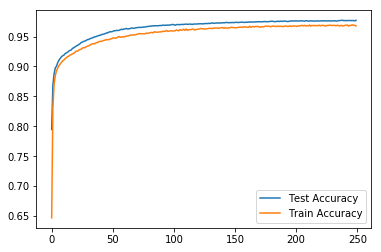

In [424]:
fig, ax = plt.subplots(1, 1)
ax.plot(test_acc, label='Test Accuracy')
ax.plot(train_acc, label='Train Accuracy')
plt.legend()
plt.show()

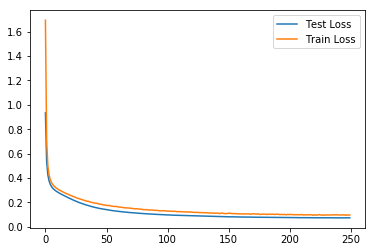

In [425]:
fig, ax = plt.subplots(1, 1)
ax.plot(test_loss, label='Test Loss')
ax.plot(train_loss, label='Train Loss')
plt.legend()
plt.show()

# Without DropOut Regularization

In [439]:
# Update the paramteres
batch_size = 64
n_epochs = 500
learning_rate = 1e-2
train_loss = []
test_loss = []
test_acc = []
train_acc = []
keep_prob = 1.0
number_of_batches = m // batch_size
for epoch in range(n_epochs):
    loss = 0.0
    correct_cnt = 0
    for i in range(0, m - m % batch_size, batch_size):
        X = train_images[i: i + batch_size]
        y = train_labels[i: i + batch_size]
        # Forward propagation
        Z1 = X.dot(W1) + b1
        A1 = np.tanh(Z1)
        # DropOut
        dropout_mask = np.random.uniform(size=A1.shape)
        dropout_mask = dropout_mask <= keep_prob
        A1 = A1 * dropout_mask
        A1 /= keep_prob
        Z2 = A1.dot(W2) + b2
        yhat = np.exp(Z2) / np.sum(np.exp(Z2), axis=1, keepdims=True)
        # Cross Entropy Loss
        loss += np.mean(-np.log(yhat[range(X.shape[0]), y]))
        correct_cnt += np.sum(np.argmax(yhat, axis=1) == y)
        # Backpropagation
        dZ2 = yhat
        dZ2[range(i % batch_size, (i % batch_size + batch_size)), y] -= 1
        dZ2 = dZ2 / batch_size
        dW2 = A1.T.dot(dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)
        dZ1 = dZ2.dot(W2.T) * (1 - A1 ** 2)
        dZ1 = dZ1 * dropout_mask
        dW1 = X.T.dot(dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        # Update
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
    loss_train = loss / number_of_batches
    train_accuracy = correct_cnt / m
    train_acc.append(train_accuracy)
    train_loss.append(loss_train)
    X = test_images
    Z1 = X.dot(W1) + b1
    A1 = np.tanh(Z1)
    Z2 = A1.dot(W2) + b2
    yhat = np.exp(Z2) / np.sum(np.exp(Z2), axis=1, keepdims=True)
    # Cross Entropy Loss
    loss_test = np.mean(-np.log(yhat[range(X.shape[0]), test_labels]))
    test_loss.append(loss_test)
    test_correct_cnt = np.sum(np.argmax(yhat, axis=1) == test_labels)
    test_accuracy = test_correct_cnt / len(test_labels)
    test_acc.append(test_accuracy)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} \t Training Acc: {train_accuracy:.4f} \t Test Acc: {test_accuracy:.4f}')

Epoch: 0 	 Training Acc: 0.6911 	 Test Acc: 0.8180
Epoch: 10 	 Training Acc: 0.9170 	 Test Acc: 0.9224
Epoch: 20 	 Training Acc: 0.9317 	 Test Acc: 0.9342
Epoch: 30 	 Training Acc: 0.9446 	 Test Acc: 0.9447
Epoch: 40 	 Training Acc: 0.9534 	 Test Acc: 0.9525
Epoch: 50 	 Training Acc: 0.9602 	 Test Acc: 0.9572
Epoch: 60 	 Training Acc: 0.9658 	 Test Acc: 0.9612
Epoch: 70 	 Training Acc: 0.9701 	 Test Acc: 0.9652
Epoch: 80 	 Training Acc: 0.9736 	 Test Acc: 0.9675
Epoch: 90 	 Training Acc: 0.9761 	 Test Acc: 0.9695
Epoch: 100 	 Training Acc: 0.9787 	 Test Acc: 0.9707
Epoch: 110 	 Training Acc: 0.9809 	 Test Acc: 0.9716
Epoch: 120 	 Training Acc: 0.9830 	 Test Acc: 0.9737
Epoch: 130 	 Training Acc: 0.9846 	 Test Acc: 0.9746
Epoch: 140 	 Training Acc: 0.9859 	 Test Acc: 0.9761
Epoch: 150 	 Training Acc: 0.9871 	 Test Acc: 0.9764
Epoch: 160 	 Training Acc: 0.9882 	 Test Acc: 0.9771
Epoch: 170 	 Training Acc: 0.9895 	 Test Acc: 0.9775
Epoch: 180 	 Training Acc: 0.9906 	 Test Acc: 0.9783
Epoc

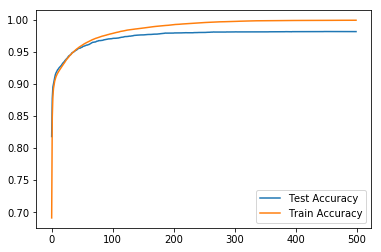

In [440]:
fig, ax = plt.subplots(1, 1)
ax.plot(test_acc, label='Test Accuracy')
ax.plot(train_acc, label='Train Accuracy')
plt.legend()
plt.show()

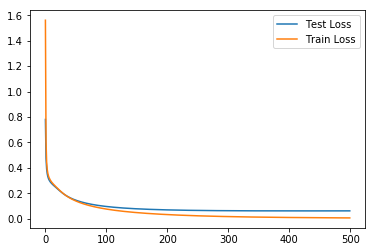

In [441]:
fig, ax = plt.subplots(1, 1)
ax.plot(test_loss, label='Test Loss')
ax.plot(train_loss, label='Train Loss')
plt.legend()
plt.show()

In [442]:
train_acc[-1]

0.9992

In [381]:
test_acc[-1]

0.9812